# Run this file after sql query (SQL 작업 후 시행합니다.)
## Data load from SQL query and do EDA and then export the file from pandas
## SQL작업 데이터 호출, EDA 후 저장

In [ ]:
# install package if necessary 패키지 설치
!pip install cx_Oracle

In [1]:
import pandas as pd
import cx_Oracle as oci  # data import. it is told that python 3.4 is preferable.

# Go to C:\oraclexe\app\oracle\product\11.2.0\server\network\ADMIN. Then check 'port (1521)' and 'service name(xe)' in 'tnsname.ora'
# use your own information on user and pw.  (user와 pw변수는 각자 맞는 정보로 고쳐서 실행)
user = "DB"
pw = "1234"
dsn = "localhost:1521/xe" 


# connection 연결
con = oci.connect(user=user, password=pw, dsn=dsn)

# cursor 커서
cur = con.cursor()


query = 'select * from FD'
df = pd.read_sql_query(query, con)
df

C:\Users\Seward_Shin\AppData\Local\Temp\ipykernel_21836\3298675488.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


,TRANS_NUM,CC_NUM,CATEGORY,AMT,GENDER,CITY,STATE,CITY_POP,JOB,IS_FRAUD,AGE,TRANS_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,TRANS_DAY_SIMPLIFIED,IS_COVID_YEAR
0,0b242abb623afc578575680df30655b9,2703190000000000.0,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,35,2019,1,1,0,0,0,0
1,1f76529f8574734946361c461b024d99,630423000000.0,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,45,2019,1,1,0,0,0,0
2,a1a22d70485983eac12b5b88dad1cf95,38859500000000.0,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,61,2019,1,1,0,0,0,0
3,6b849c168bdad6f867558c3793159a81,3534090000000000.0,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,56,2019,1,1,0,0,0,0
4,a41d7549acf90789359a9aa5346dcb46,375534000000000.0,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,37,2019,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604289,9b1f753c79894c9f4b71f04581835ada,30560609640617.0,health_fitness,43.77,M,Luray,MO,519,Town planner,0,57,2020,12,31,23,3,2,1
1604290,2090647dac2c89a1d86c514c427f5b91,3556613125071656.0,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,0,23,2020,12,31,23,3,2,1
1604291,6c5b7c8add471975aa0fec023b2e8408,6011724471098086.0,kids_pets,86.88,F,Burbank,WA,3684,Musician,0,41,2020,12,31,23,3,2,1
1604292,14392d723bb7737606b2700ac791b7aa,4079773899158.0,travel,7.99,M,Mesa,ID,129,Cartographer,0,57,2020,12,31,23,3,2,1


In [2]:
df.info()   # check if the data is correctly load. 기본 정보 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_NUM              1604294 non-null  object 
 1   CC_NUM                 1604294 non-null  object 
 2   CATEGORY               1604294 non-null  object 
 3   AMT                    1604294 non-null  float64
 4   GENDER                 1604294 non-null  object 
 5   CITY                   1604294 non-null  object 
 6   STATE                  1604294 non-null  object 
 7   CITY_POP               1604294 non-null  int64  
 8   JOB                    1604294 non-null  object 
 9   IS_FRAUD               1604294 non-null  int64  
 10  AGE                    1604294 non-null  int64  
 11  TRANS_YEAR             1604294 non-null  int64  
 12  TRANS_MONTH            1604294 non-null  int64  
 13  TRANS_DAY              1604294 non-null  int64  
 14  TRANS_HOUR        

In [3]:
df["CATEGORY"].value_counts() # check the category. 카테고리 파악

gas_transport     162800
grocery_pos       152459
home              151923
shopping_pos      144144
kids_pets         140096
shopping_net      120678
entertainment     116085
food_dining       113309
personal_care     112825
health_fitness    106036
misc_pos           99066
misc_net           78449
grocery_net        56145
travel             50279
Name: CATEGORY, dtype: int64

In [4]:
# numeric labeling function for category, gender, state. (category, gender, state에 대한 numeric labeling 함수)
def column_labeling(DF, col_name):
    count = 0
    label_dict = {}
    column_list = []
    
    for i in DF[col_name]:
        if i in label_dict.keys():
            column_list.append(label_dict[i])
        else:
            label_dict[i] = count;
            count = count + 1
            column_list.append(label_dict[i])
            
    save_dict = pd.DataFrame()
    save_dict["string"] = label_dict.keys()
    save_dict["integer"] = label_dict.values()
    save_dict.to_csv("data/"+col_name+"_label.csv", index=False)
    
    DF[col_name] = column_list
    return DF

df = column_labeling(df, "CATEGORY")
df = column_labeling(df, "GENDER")
df = column_labeling(df, "STATE")
df.head(10)

,TRANS_NUM,CC_NUM,CATEGORY,AMT,GENDER,CITY,STATE,CITY_POP,JOB,IS_FRAUD,AGE,TRANS_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,TRANS_DAY_SIMPLIFIED,IS_COVID_YEAR
0,0b242abb623afc578575680df30655b9,2703190000000000.0,0,4.97,0,Moravian Falls,0,3495,"Psychologist, counselling",0,35,2019,1,1,0,0,0,0
1,1f76529f8574734946361c461b024d99,630423000000.0,1,107.23,0,Orient,1,149,Special educational needs teacher,0,45,2019,1,1,0,0,0,0
2,a1a22d70485983eac12b5b88dad1cf95,38859500000000.0,2,220.11,1,Malad City,2,4154,Nature conservation officer,0,61,2019,1,1,0,0,0,0
3,6b849c168bdad6f867558c3793159a81,3534090000000000.0,3,45.00,1,Boulder,3,1939,Patent attorney,0,56,2019,1,1,0,0,0,0
4,a41d7549acf90789359a9aa5346dcb46,375534000000000.0,4,41.96,1,Doe Hill,4,99,Dance movement psychotherapist,0,37,2019,1,1,0,0,0,0
5,189a841a0a8ba03058526bcfe566aab5,4767270000000000.0,3,94.63,0,Dublin,5,2158,Transport planner,0,62,2019,1,1,0,0,0,0
6,83ec1cc84142af6e2acf10c44949e720,30074700000000.0,5,44.54,0,Holcomb,6,2691,Arboriculturist,0,30,2019,1,1,0,0,0,0
7,6d294ed2cc447d2c71c7171a3d54967c,6011360000000000.0,3,71.65,1,Edinburg,4,6018,"Designer, multimedia",0,76,2019,1,1,0,0,0,0
8,fc28024ce480f8ef21a32d64c93a29f5,4922710000000000.0,4,4.27,0,Manor,5,1472,Public affairs consultant,0,82,2019,1,1,0,0,0,0
9,3b9014ea8fb80bd65de0b1463b00b00e,2720830000000000.0,1,198.39,0,Clarksville,7,151785,Pathologist,0,49,2019,1,1,0,0,0,0


### New  Labeled Columns Index

__CATEGORY:__ 0 = misc_net, 1 = grocery_pos, 2 = entertainment, 3 = gas_transport, 4 = misc_pos, 5 = grocery_net, 6 = shooping_net, 7 = shopping_pos  
8 = food_dining, 9 = personal_care, 10 = health_fitness, 11 = travel, 12= kids_pets, 13 = home  
* POS = point of sale, local payment while __net__ refers to 'online' payment

__GENDER:__ 0 = W, 1 = M  

__STATE:__ NC 0
,WA 1
,ID 2
,MT 3
,VA 4
,PA 5
,KS 6
,TN 7
,IA 8
,WV 9
,FL 10
,CA 11
,NM 12
,NJ 13
,OK 14
,IN 15
,MA 16
,TX 17
,WI 18
,MI 19
,WY 20
,HI 21
,NE 22
,OR 23
,LA 24
,DC 25
,KY 26
,NY 27
,MS 28
,UT 29
,AL 30
,AR 31
,MD 32
,GA 33
,ME 34
,AZ 35
,MN 36
,OH 37
,CO 38
,VT 39
,MO 40
,SC 41
,NV 42
,IL 43
,NH 44
,SD 45
,AK 46
,ND 47
,CT 48
,RI 49
,DE 50

In [5]:
df = df.drop(columns='TRANS_NUM')  # remove index
# change the column sequence. 컬럼 순서 병경
df = df[['TRANS_YEAR','IS_COVID_YEAR', 'TRANS_MONTH','TRANS_DAY','TRANS_DAY_SIMPLIFIED','TRANS_HOUR','TRANS_HOUR_SIMPLIFIED','CATEGORY','AMT','GENDER','CITY','CITY_POP','STATE','JOB','AGE','IS_FRAUD', 'CC_NUM']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_YEAR             1604294 non-null  int64  
 1   IS_COVID_YEAR          1604294 non-null  int64  
 2   TRANS_MONTH            1604294 non-null  int64  
 3   TRANS_DAY              1604294 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   1604294 non-null  int64  
 5   TRANS_HOUR             1604294 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  1604294 non-null  int64  
 7   CATEGORY               1604294 non-null  int64  
 8   AMT                    1604294 non-null  float64
 9   GENDER                 1604294 non-null  int64  
 10  CITY                   1604294 non-null  object 
 11  CITY_POP               1604294 non-null  int64  
 12  STATE                  1604294 non-null  int64  
 13  JOB                    1604294 non-null  object 
 14  AGE               

In [6]:
# statistics for numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANS_YEAR,1604294.0,2019.423516,0.494116,2019.0,2019.00,2019.00,2020.00,2020.0
IS_COVID_YEAR,1604294.0,0.423516,0.494116,0.0,0.00,0.00,1.00,1.0
TRANS_MONTH,1604294.0,7.551812,3.489999,1.0,5.00,8.00,11.00,12.0
TRANS_DAY,1604294.0,15.853612,8.931615,1.0,8.00,16.00,24.00,31.0
TRANS_DAY_SIMPLIFIED,1604294.0,1.025187,0.829122,0.0,0.00,1.00,2.00,2.0
TRANS_HOUR,1604294.0,12.803644,6.814804,0.0,7.00,14.00,19.00,23.0
TRANS_HOUR_SIMPLIFIED,1604294.0,1.583147,1.100024,0.0,1.00,2.00,3.00,3.0
CATEGORY,1604294.0,6.529084,4.103601,0.0,3.00,7.00,10.00,13.0
AMT,1604294.0,69.972091,158.849170,1.0,9.64,47.39,83.04,28948.9
GENDER,1604294.0,0.452186,0.497709,0.0,0.00,0.00,1.00,1.0


###  Statistics Summary and Found (numeric data only)
* TRANS_YEAR: only 2019 and 2020 avaiable (no outlier)    
* IS_COVID_YEAR: nothing special (no outlier)
* TRANS_MONTH: nothing special (no outlier)    
* TRANS_DAY: nothing special (no outlier)    
* TRANS_DAY_SIMPLIFIED: nothing special (no outlier) 
* TRANS_HOUR: nothing special (no outlier)  
* TRANS_HOUR_SIMPLIFIED: nothing special (no outlier) 
* CATEGORY: mean is in [6, 7] This indicates 'shopping' is the most frequent category regardless of online or offline. 
* AMT: the huge difference between min and max, and 158 std implies the possibility of the oulier.
* GENDER: nothing special (no outlier)
* CITY_POP: The huge difference between min and max, and 301728 std implies the possibility of the oulier.  
  
 Some might doubt the existence of the city with 23 people only in the real world. The original table shows that the minimum population of 23 is from Notrees TX. This city exists in the real world and its population was told 23 in 2010. This suggests the outdated data problem in the CITY_POP column when the data is about 2019 and 2020. According to the updated population in 08/2023 from 'bestplaces.net,' only 16 people reside in Notress. __However, since the residual from outdated data cannot be simply solved within limited time and sources of this repo, we decided to leave it as a possible improvement in the future.__ Therefore, in this repo, the possible outlier in CITY_POP is not considered as an incorrect input error that needs to be removed, but considered as a natural cause with real data despite the outdated problem only.
  
* STATE: nothing special (no outlier)   
* AGE: range is from 18 to 98. There might be an outlier.
* IS_FRAUD: Target data. The number of False is 1596143 out of 1604294.   
  
          This suggests the target data is not well balanced.


### 데이터 이상유무
* TRANS_YEAR: 2019, 2020만 있는 데이터임 보임 (이상 無)    
* IS_COVID_YEAR: 데이터 이상 無  
* TRANS_MONTH: 1월부터 12월까지 있는 데이터임을 보임 (이상 無)    
* TRANS_DAY: 1일부터 31일까지 있는 데이터임을 보임 (이상 無)    
* TRANS_DAY_SIMPLIFIED: 데이터 이상 無  
* TRANS_HOUR: 0(=24)시부터 23시까지의 데이터를 보임 (이상 無)  
* TRANS_HOUR_SIMPLIFIED: 데이터 이상 無  
* CATEGORY: Shooping 비중이 온오프라인 통틀어 높다.  
* AMT: 거래한 금액, 이상치여부 진단 필요  
* GENDER: 데이터 이상 無
* CITY_POP: 카드 소지자의 거주도시 전체 인구, 이상치여부 진단 필요  
  
최소값에 따르면, 23명만 사는 도시가 정말 있을지에 대한 의문이 생겼다. 그러나 실제로 미국 텍사스 주의 Nortress는 2010년에 23명만 거주한다는 자료가 존재한다. 이는 전체 데이터가 2019년과 2020년을 다루는데 인구 정보의 자료 연도가 2010년에 머무른다는 문제를 제시한다. 'bestplace.net'에 따르면 2023년 08월 기준 Nortress는 16명만 거주한다. __그러나 여기 repo에서는 시간과 환경의 제한을 이유로 이에 대한 데이터 수정을 하지않고, 차후 개선점으로 두고자 한다.__ 결론적으로 여기서 CITY_POP의 이상치가 있다면 그 이유는, 반드시 제거해야하는 잘못 입력된 정보때문으로 간주하지 않는다. 연식이 지났을 뿐, 실제 내용을 올바르게 입력된 데이터라는 점에서 natural cause로 간주한다.
  
* STATE: 미국 51개 주에 대한 정보  
* AGE: 18세부터 98세까지의 연령의 데이터를 보임, 이상치여부 진단 필요 
* IS_FRAUD: FRAUD가 아닌 경우가 전체 1604294에서 1596143개인 데이터 불균형 문제 있음   

In [7]:
df.describe(include='all').T  # statistics for all data. 문자열 정보를 포함한 경우까지 조회

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TRANS_YEAR,1604294.0,NaN,NaN,NaN,2019.423516,0.494116,2019.0,2019.0,2019.0,2020.0,2020.0
IS_COVID_YEAR,1604294.0,NaN,NaN,NaN,0.423516,0.494116,0.0,0.0,0.0,1.0,1.0
TRANS_MONTH,1604294.0,NaN,NaN,NaN,7.551812,3.489999,1.0,5.0,8.0,11.0,12.0
TRANS_DAY,1604294.0,NaN,NaN,NaN,15.853612,8.931615,1.0,8.0,16.0,24.0,31.0
TRANS_DAY_SIMPLIFIED,1604294.0,NaN,NaN,NaN,1.025187,0.829122,0.0,0.0,1.0,2.0,2.0
TRANS_HOUR,1604294.0,NaN,NaN,NaN,12.803644,6.814804,0.0,7.0,14.0,19.0,23.0
TRANS_HOUR_SIMPLIFIED,1604294.0,NaN,NaN,NaN,1.583147,1.100024,0.0,1.0,2.0,3.0,3.0
CATEGORY,1604294.0,NaN,NaN,NaN,6.529084,4.103601,0.0,3.0,7.0,10.0,13.0
AMT,1604294.0,NaN,NaN,NaN,69.972091,158.84917,1.0,9.64,47.39,83.04,28948.9
GENDER,1604294.0,NaN,NaN,NaN,0.452186,0.497709,0.0,0.0,0.0,1.0,1.0


###  Statistics Summary and Found (the rest data only)
* CITY: nothing special (no outlier) 
* JOB: nothing special (no outlier)
* CC_NUM: This data is about credit card usage of 1860 people(unique).

### 데이터 이상유무 (numeric data 제외)
* CITY: 데이터 이상 無   
* JOB: 데이터 이상 無  
* CC_NUM: 이 데이터는 1860명의 카드 소비에 대해서 다루고 있다.  
  

Let's examine possible outliers and problems from AMT, CITY_POP, AGE, and STATE.   
다음은 AMT, CITY_POP, AGE, STATE에 대한 데이터 치우침의 여부를 파악한다.

## AMT

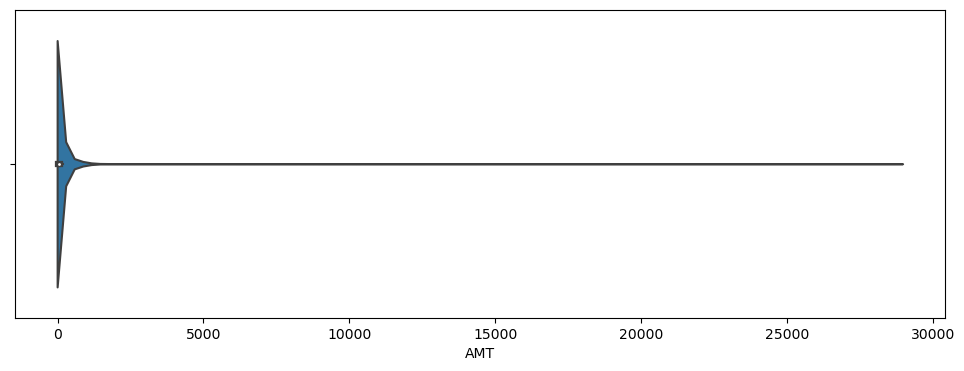

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# boxplot내부 분포도 같이 확인하기위해 violinplot을 사용한다.
plt.figure(figsize=(12,4))
sns.violinplot(x= 'AMT', data=df)
plt.show()

This plot shows that most of its data is considered outlier. This indicates the further process is required.  
AMT컬럼의 데이터 양상은 plot기준 대부분의 데이터가 이상치로 잡히므로 데이터 조정이 필요하다. 

* Note that all outlier causes in this data are merely natural outlier. (자연발생)

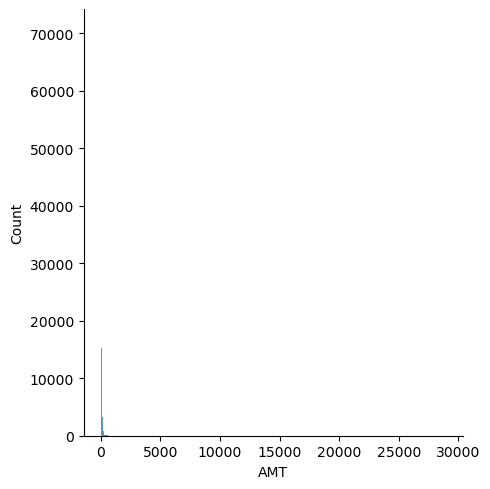

Skewness: 40.325371
Kurtosis: 4090.640056


In [9]:
sns.displot(df['AMT'])
plt.show()
print("Skewness: %f" % df['AMT'].skew())
print("Kurtosis: %f" % df['AMT'].kurt())

* Note that count implies frequency. (빈도)  
  
This clearly shows the extreme skewness and kurtosis. In order to alleviate the extreme status, let's try log transformation.

이를 뒷받침하듯 skewness가 40이상이다. 또한 kurtosis값이 4090으로 표준 정규분포보다 매우 뾰족하며, 데이터가 한 곳에 집중된 정도가 극단적이다.  
 → 이러한 극단성을 효과적으로 완화하기위해 natural log기법을 사용한다.

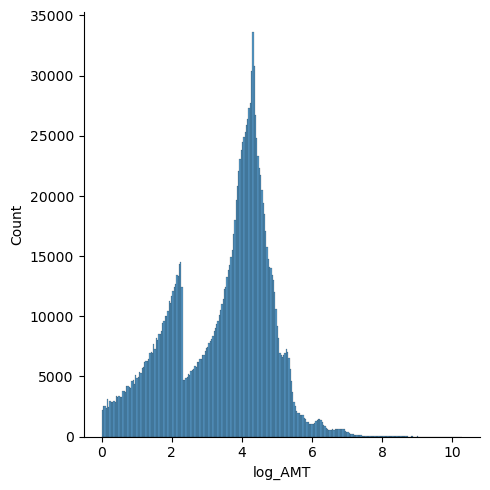

Skewness: -0.451907
Kurtosis: -0.395283


In [10]:
import numpy as np
# put natural log on AMT column and see how it goes. AMT 컬럼에 자연로그를 씌우고 양상을 확인한다.
df['log_AMT'] = np.log(df['AMT'])
sns.displot(df['log_AMT'])
plt.show()
print("Skewness: %f" % df['log_AMT'].skew())
print("Kurtosis: %f" % df['log_AMT'].kurt())

[Skewness] < 0.5 indicates the data is moderately not skewed.  
Kurtosis < 0 indicates platykurtic whose its thin tail implies less frequent outliers.  

 → Overall, the result has improved than the previous status.

[Skewness] < 0.5 이므로 비교적 대칭적이라 판단할 수 있다.  
Kurtosis < 0 이므로, 정규분포보다 완만한 형태라 판단할 수 있다.  

 → 결과적으로 이전보다 Skewness와 kurtosis의 극단성이 해결되었다.

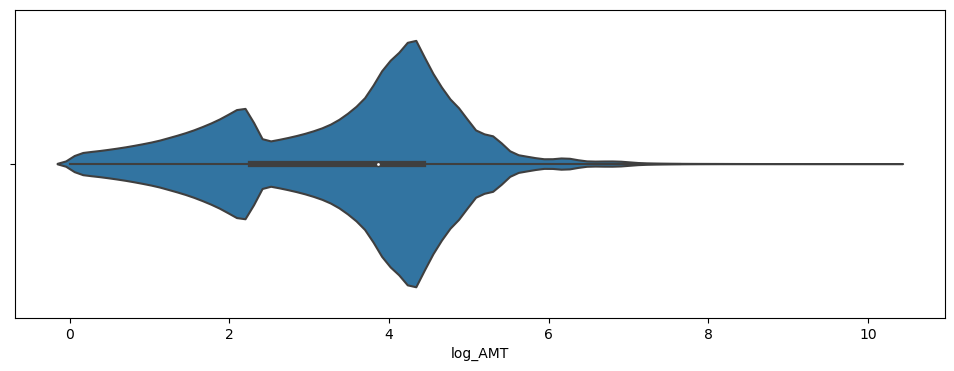

In [11]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'log_AMT', data=df)
plt.show()

This violinplot clearly shows less outlier than before. Then let's roughly test its nomarlity through QQ plot(Quantile-Quantile Plot).

violinplot에서도 이전보다 outlier가 줄어든 양상을 보여주고있다.  
이를 QQ plot(Quantile-Quantile Plot)에서 정규성을 재점검한다.  

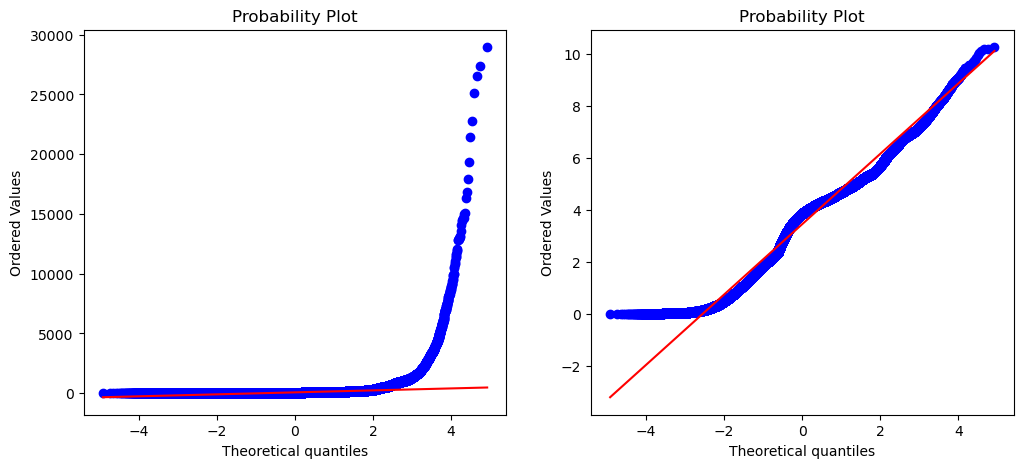

In [12]:
from scipy import stats

fig = plt.figure(figsize = (12,5))

fig.add_subplot(1,2,1)
res = stats.probplot(df['AMT'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['log_AMT'], plot=plt)

Both graphs show how log_AMT has remarkably normalized from AMT despite the left tail. Then, let's check if log_AMT is similar with other kinds of distributions.

기존 원본데이터에 비해서 log_AMT가 정규분포에 근사하게 변하였음을 알 수 있다.  
그렇다면 log_AMT가 정규분포 외에 다른 분포와 유사성이 없는지를 점검한다.

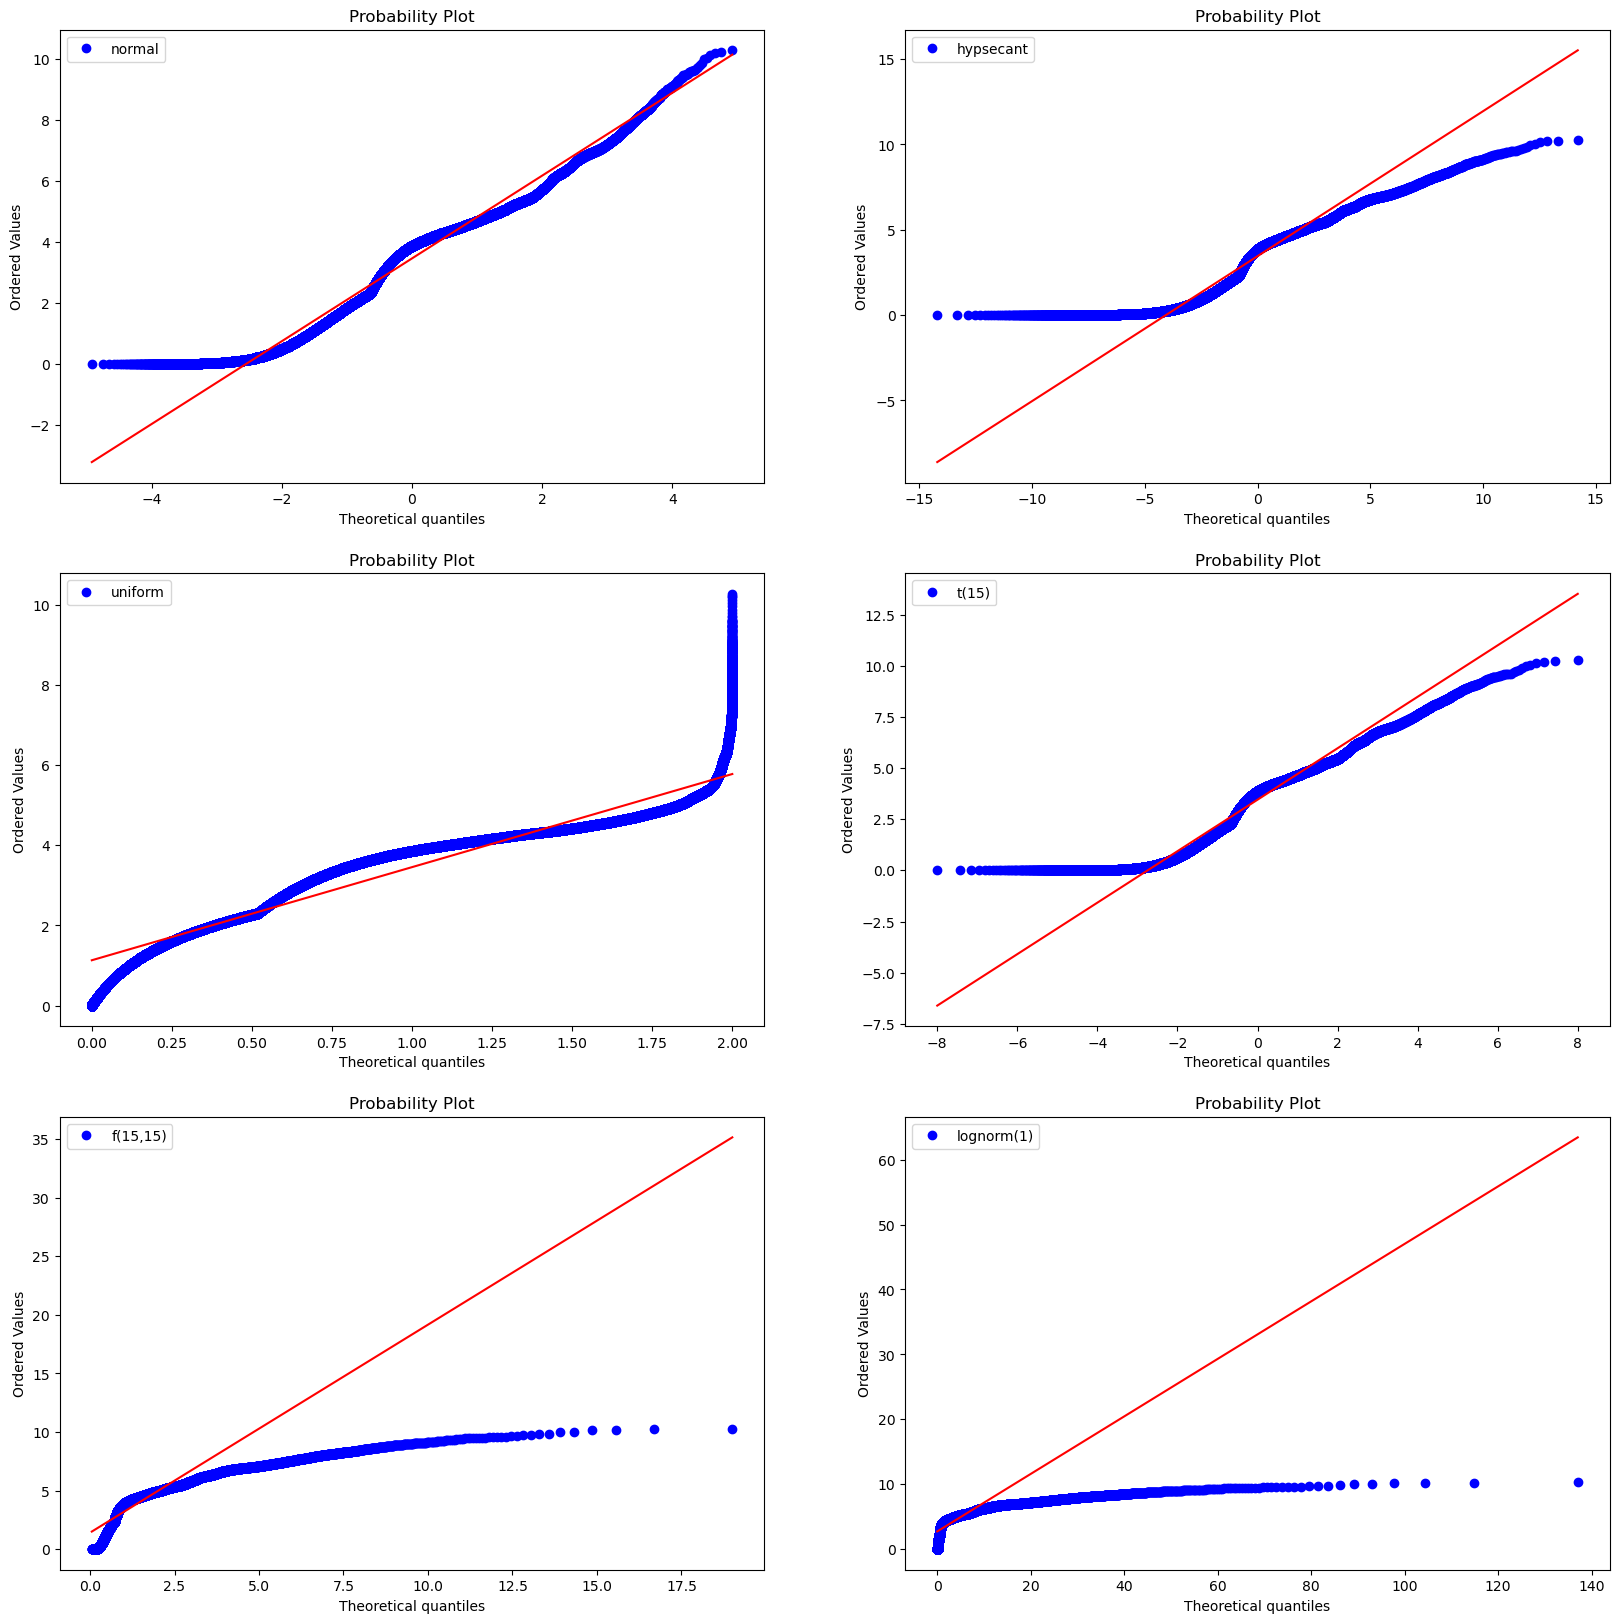

In [13]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

stats.probplot(df['log_AMT'], dist=stats.norm, plot=ax1)
ax1.legend(['normal'])
stats.probplot(df['log_AMT'], dist=stats.hypsecant, plot=ax2)
ax2.legend(['hypsecant'])
stats.probplot(df['log_AMT'], dist=stats.uniform(0,2), plot=ax3)
ax3.legend(['uniform'])
stats.probplot(df['log_AMT'], dist=stats.t(15), plot=ax4)
ax4.legend(['t(15)'])
stats.probplot(df['log_AMT'], dist=stats.f(15,15), plot=ax5)
ax5.legend(['f(15,15)'])
stats.probplot(df['log_AMT'], dist=stats.lognorm(1), plot=ax6)
ax6.legend(['lognorm(1)'])

plt.show()

→ None of distributions fits to AMT compared to the normal distribution.   
However, this does not mean that log_AMT is normally distributed because of the left tail. Since the left tail is from a natural cause, we do not remove it unless it is required in the later process. 

쌍곡선할선, 균등, 자유도 15의 t와 f, lognorm 그래프와 첫 정규분포그래프를 비교할 때, 빨간선에 비교적 일치하면서, 극단값의 가능성이 제일 적은 것은 그나마 정규분포모양이다. 그러나 전반부의 이탈된 부분으로 인해 정규화가 되었다고 엄밀하게 말하긴 어려운 상태이다.  

여기서 데이터 outlier 원인은 natrual cause이므로, 함부로 삭제하지않는다.  
  추후 분석과정에서 엄밀한 정규화가 필요할 시에, outlier의 영향을 덜받는 sklearn의 Normalizer나 RobustScaler를 고려한다.


## CITY_POP

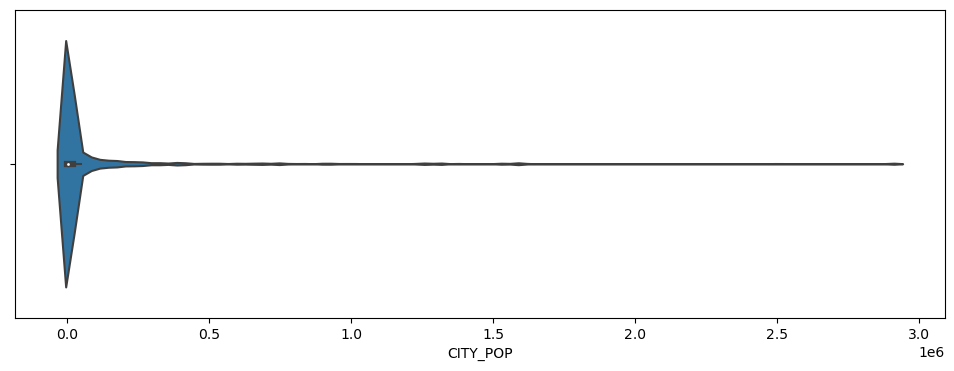

In [14]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'CITY_POP', data=df)
plt.show()

This plot shows that most of its data is considered outlier like __AMT__ above. This indicates the further process is needed.  
CITY_POP도 AMT와 같이 대부분의 데이터가 이상치로 잡히므로 데이터 조정이 필요하다.

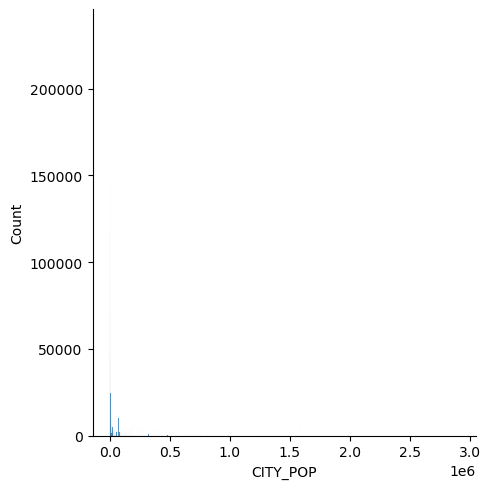

Skewness: 5.585024
Kurtosis: 37.491799


In [15]:
sns.displot(df['CITY_POP'])
plt.show()
print("Skewness: %f" % df['CITY_POP'].skew())
print("Kurtosis: %f" % df['CITY_POP'].kurt())

Although it is less values than AMT's, this clearly shows the problem of skewness and kurtosis. In order to alleviate the status, let's try log transformation again.

skewness와 kurtosis는 AMT보다 극단성 수치는 적지만, 그래프상 극단성을 보이고 있다.  
→ 이러한 극단성을 효과적으로 완화하기위해 AMT와 같이 natrual log기법을 사용한다.

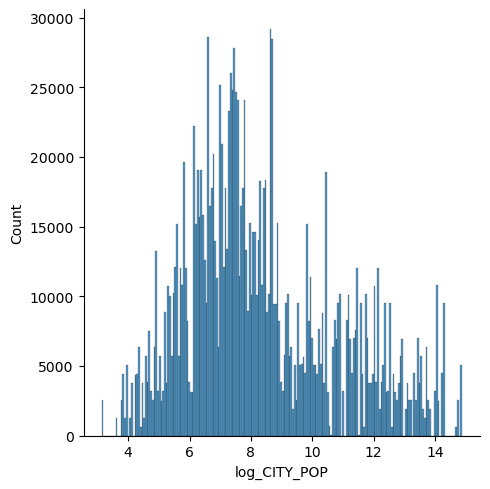

Skewness: 0.604908
Kurtosis: -0.298234


In [16]:
# put natural log on CITY_POP column and see how it goes.  CITY_POP 컬럼에 자연로그를 씌우고 양상을 확인한다.
df['log_CITY_POP'] = np.log(df['CITY_POP'])
sns.displot(df['log_CITY_POP'])
plt.show()
print("Skewness: %f" % df['log_CITY_POP'].skew())
print("Kurtosis: %f" % df['log_CITY_POP'].kurt())

0.5 < [Skewness] < 1 indicates the data is moderately skewed.  
Kurtosis < 0 indicates platykurtic whose its thin tail implies less frequent outliers.  

 → Overall, the result has improved than the previous status.

0.5 <[Skewness] < 1 이므로 극단성은 해소한 moderately skewed 상태가 되었다.  
Kurtosis < 0 이므로, 정규분포보다 완만한 형태라 판단할 수 있다.  

→ 결과적으로 이전보다 Skewness와 kurtosis의 극단성이 해결되었다.

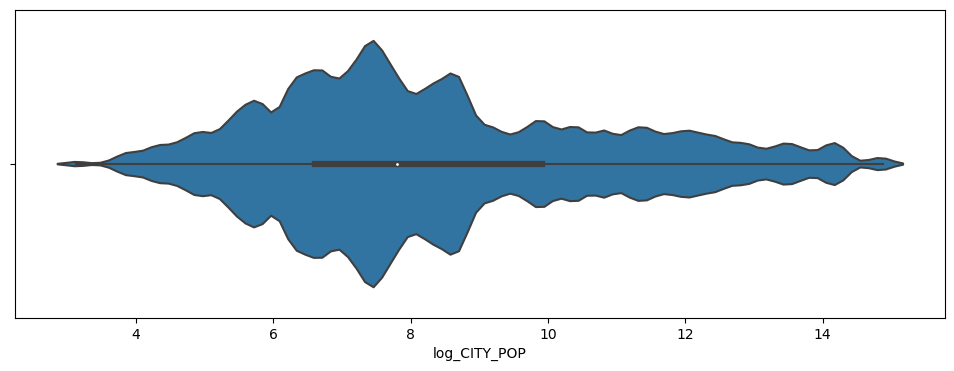

In [17]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'log_CITY_POP', data=df)
plt.show()

This violinplot clearly shows less outlier than before. Then let's roughly test its nomarlity through QQ plot(Quantile-Quantile Plot).

violinplot에서도 이전보다 outlier가 줄어든 양상을 보여주고있다.  
이를 QQ plot(Quantile-Quantile Plot)에서 정규성을 재점검한다.

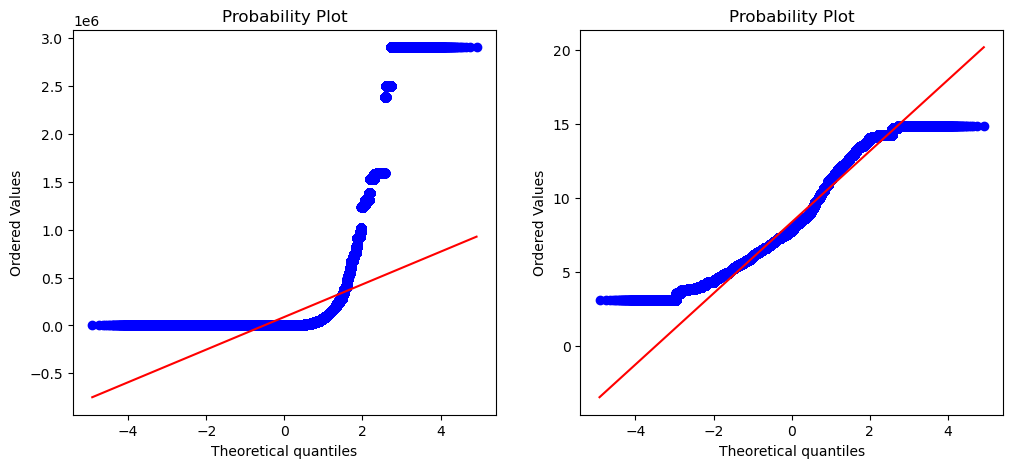

In [18]:
fig = plt.figure(figsize = (12,5))

fig.add_subplot(1,2,1)
res = stats.probplot(df['CITY_POP'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['log_CITY_POP'], plot=plt)

The tail shows it is not normally distributed yet in spite of the improvement.  
전보다 정규분포와 가까워졌으나 정규분포라고 단정짓기엔 어려운 상황이다.

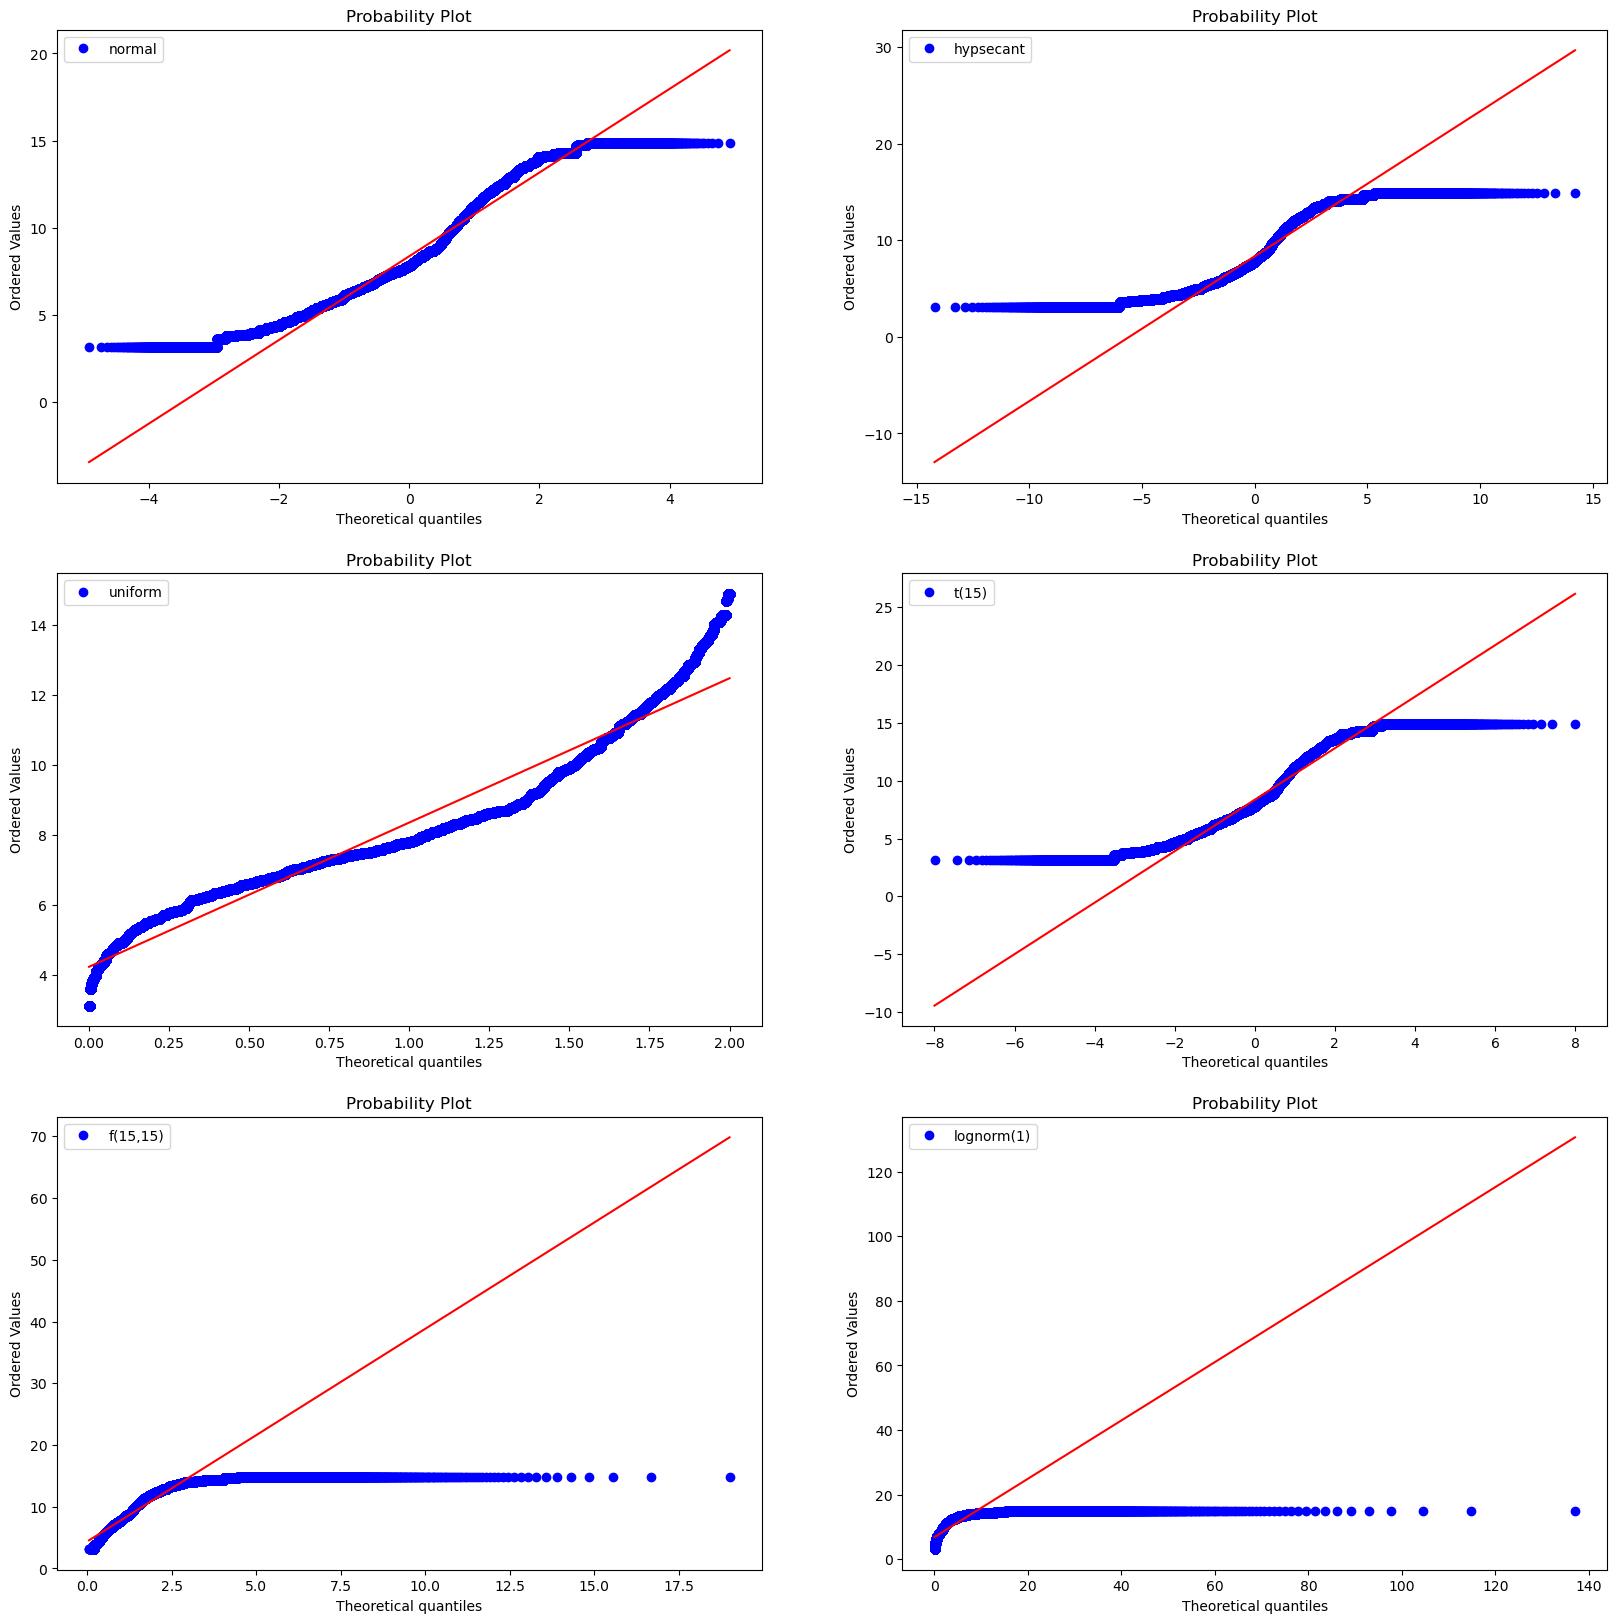

In [19]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

stats.probplot(df['log_CITY_POP'], dist=stats.norm, plot=ax1)
ax1.legend(['normal'])
stats.probplot(df['log_CITY_POP'], dist=stats.hypsecant, plot=ax2)
ax2.legend(['hypsecant'])
stats.probplot(df['log_CITY_POP'], dist=stats.uniform(0,2), plot=ax3)
ax3.legend(['uniform'])
stats.probplot(df['log_CITY_POP'], dist=stats.t(15), plot=ax4)
ax4.legend(['t(15)'])
stats.probplot(df['log_CITY_POP'], dist=stats.f(15,15), plot=ax5)
ax5.legend(['f(15,15)'])
stats.probplot(df['log_CITY_POP'], dist=stats.lognorm(1), plot=ax6)
ax6.legend(['lognorm(1)'])

plt.show()

None of distributions fits to CITY_POP. This suggests log transformation might not be enough. Then, let's try double log transforamtion.

어느 분포와도 유사성을 보이지 않고있다. 이는 log tranformation 해당 데이터를 정규화하는데 충분치 않았음을 의미한다. 그래서 단순하게 여기서 log를 한 번 더 적용하는 이중로그를 수행한다.

## CITY_POP(double log)

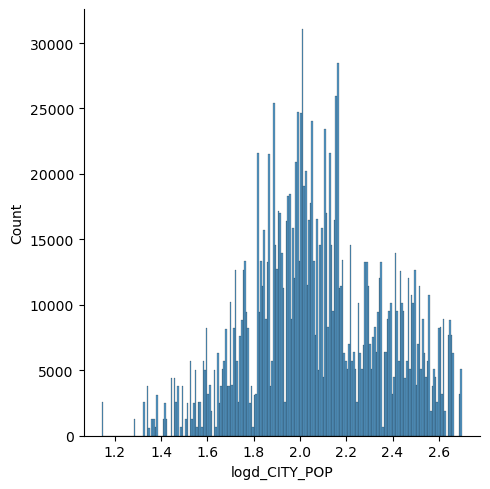

Skewness: -0.035930
Kurtosis: -0.351103


In [20]:
# put double natural log on AMT column and see how it goes.  CITY_POP 컬럼에 이중으로 자연로그를 씌우고 양상을 확인한다.
df['logd_CITY_POP'] = np.log(np.log(df['CITY_POP']))
sns.displot(df['logd_CITY_POP'])
plt.show()
print("Skewness: %f" % df['logd_CITY_POP'].skew())
print("Kurtosis: %f" % df['logd_CITY_POP'].kurt())

[Skewness] < 0.5 indicates the data is moderately not skewed.  
Kurtosis < 0 indicates platykurtic whose its thin tail implies less frequent outliers. However, its absolute value has increased.

[Skewness] < 0.5 이므로 이중로그가 비교적 대칭적이라 판단할 수 있다.  
Kurtosis < 0 인데 이전보다 절대값이 커진만큼 정규분포보다 완만한 형태를 띈다.

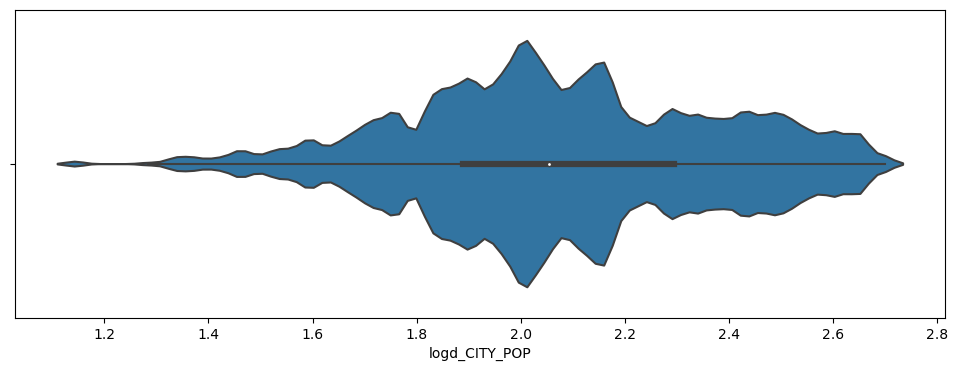

In [21]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'logd_CITY_POP', data=df)
plt.show()

This violinplot shows slightly more outlier than before. Then let's roughly test its nomarlity through QQ plot(Quantile-Quantile Plot).

violinplot은 이전보다 outlier 늘어난 양상을 보여주고있다.  
이를 QQ plot(Quantile-Quantile Plot)에서 정규성을 재점검한다.  

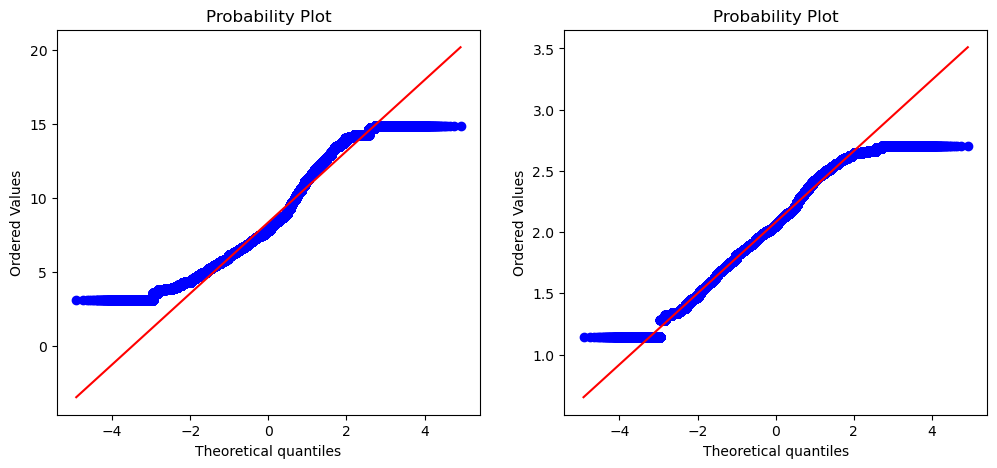

In [22]:
fig = plt.figure(figsize = (12,5))

fig.add_subplot(1,2,1)
res = stats.probplot(df['log_CITY_POP'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['logd_CITY_POP'], plot=plt)

The graph has slightly improved than the result of the single log transformation. The tail problem still appear in the graph. Then, let's try BOX-COX transformation to improve this status.

단순 로그와 이중로그의 결과를 비교해보면 나아지긴 하였으나 양쪽 극단의 부분이 여전히 문제가 되고있다. 여기서 이중로그로 인한 원본 데이터 왜곡을 최소화하는 대안으로 BOX-COX transformation을 시도해본다.  
  
  
## CITY_POP(BOX COX)
Box-Cox transform as per Box, G. E. P. and Cox, D. R. (1964), "An Analysis of Transformations," Journal of the Royal Statistical Society, Series B, 26, 211--234.

box-cox can be easily applied through scipy.boxcox().  
box cox 기법은 다음과 같은 optimal lambda를 구하고 적용을 시작한다.

In [23]:
df['BC_CITY_POP'], lambda_optimal = stats.boxcox(df['CITY_POP'])
print('y =', df['BC_CITY_POP'])
print('optimal lambda =', lambda_optimal)

y = 0          5.392291
1          3.851327
2          5.462239
3          5.143504
4          3.609760
             ...   
1604289    4.525165
1604290    6.161320
1604291    5.413758
1604292    3.767394
1604293    6.581129
Name: BC_CITY_POP, Length: 1604294, dtype: float64
optimal lambda = -0.10964136213157863


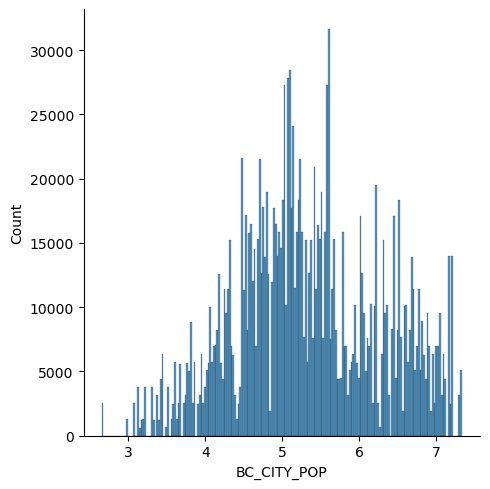

Skewness: 0.057570
Kurtosis: -0.530238


In [24]:
sns.displot(df['BC_CITY_POP'])
plt.show()
print("Skewness: %f" % df['BC_CITY_POP'].skew())
print("Kurtosis: %f" % df['BC_CITY_POP'].kurt())

[Skewness] < 0.5 indicates the data is moderately not skewed.  
Kurtosis < 0 indicates platykurtic whose its thin tail implies less frequent outliers. However, its absolute value has increased than the log transformations.

skewness가 절대값 0.5 이하로 안정적인 상태로 변하였다.  
Kurtosis의 절대값은 기존 log방법보다 높아졌다. 

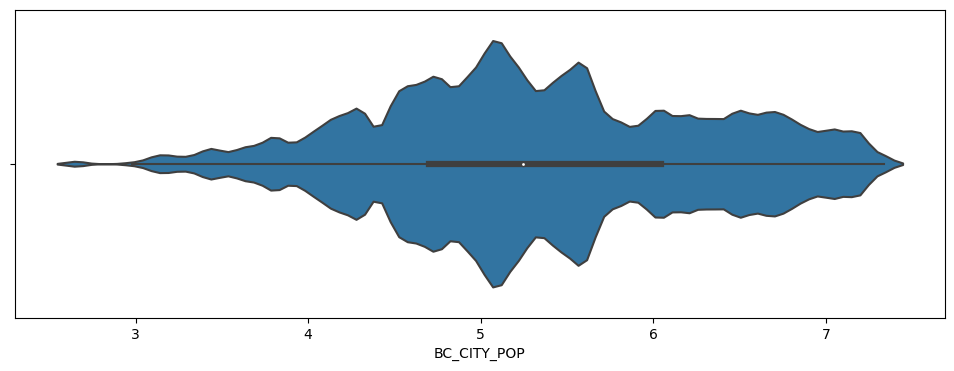

In [25]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'BC_CITY_POP', data=df)
plt.show()

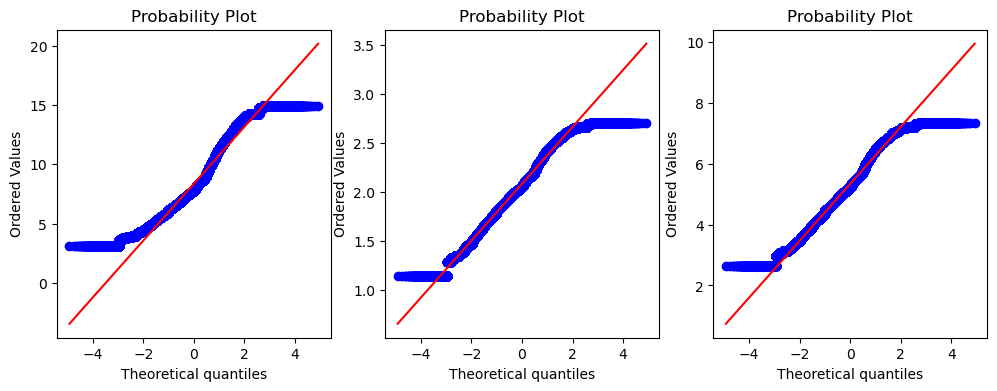

In [26]:
fig = plt.figure(figsize = (12,4))

fig.add_subplot(1,3,1)
res = stats.probplot(df['log_CITY_POP'], plot=plt)

fig.add_subplot(1,3,2)
res = stats.probplot(df['logd_CITY_POP'], plot=plt)

fig.add_subplot(1,3,3)
res = stats.probplot(df['BC_CITY_POP'], plot=plt)

Overall, the BOX-COX shape of both violin graph and qq plot is similar with double log transformation. We decided to choose the BOX-COX transformation instead of the double log transformation since the transformation is one process where its result is similar to the double log transformation. Since the tail is from a natural cause, we do not remove it unless it is required in the later process. 

violin graph와 qq plot의 양상이 이중로그의 경우와 매우 유사한 결과로 도출되었다.  
그러나 여전히 양쪽 극단 부분으로 인해 정규성에 가깝다고 결론내기 어려운 상태이다.  

이 경우, 한 번의 transformation만 거친 box-cox 방법을 선택한다.  
여기서 데이터 outlier 원인은 natrual cause이므로, 함부로 삭제하지않는다.  
  
추후 분석과정에서 정규화가 필요할 시에, outlier의 영향을 덜받는 sklearn의 Normalizer나 RobustScaler를 고려한다.  
  

## AGE and STATE

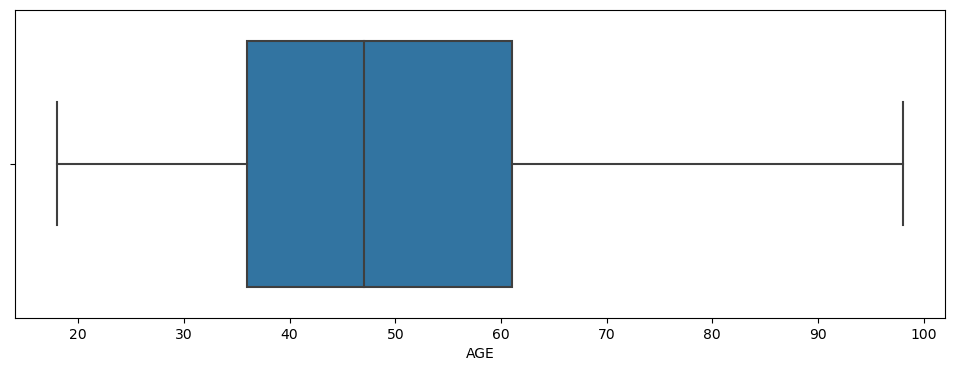

In [27]:
plt.figure(figsize=(12,4))
sns.boxplot(x= 'AGE', data=df)
plt.show()

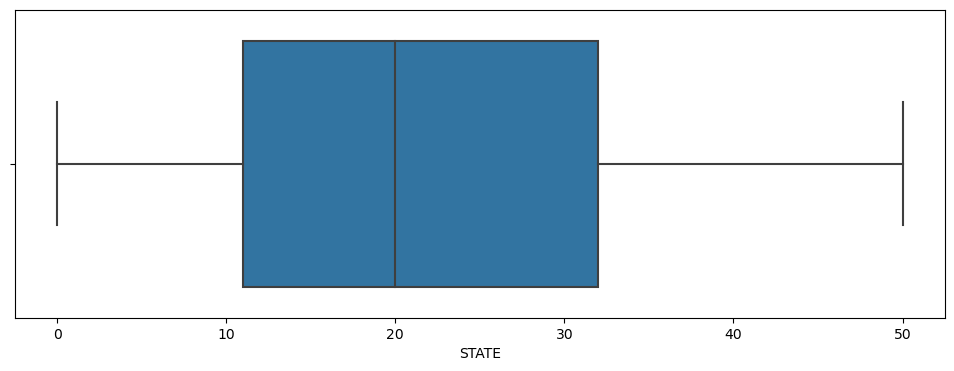

In [28]:
plt.figure(figsize=(12,4))
sns.boxplot(x= 'STATE', data=df)
plt.show()

Both AGE and STATE look good without outliers.  
그래프에 따르면 AGE와 STATE는 outlier없이 지정된 범위내에 있음을 알 수 있다.


## Correlation Analysis and Multicollinearity

C:\Users\Seward_Shin\AppData\Local\Temp\ipykernel_21836\1963306138.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


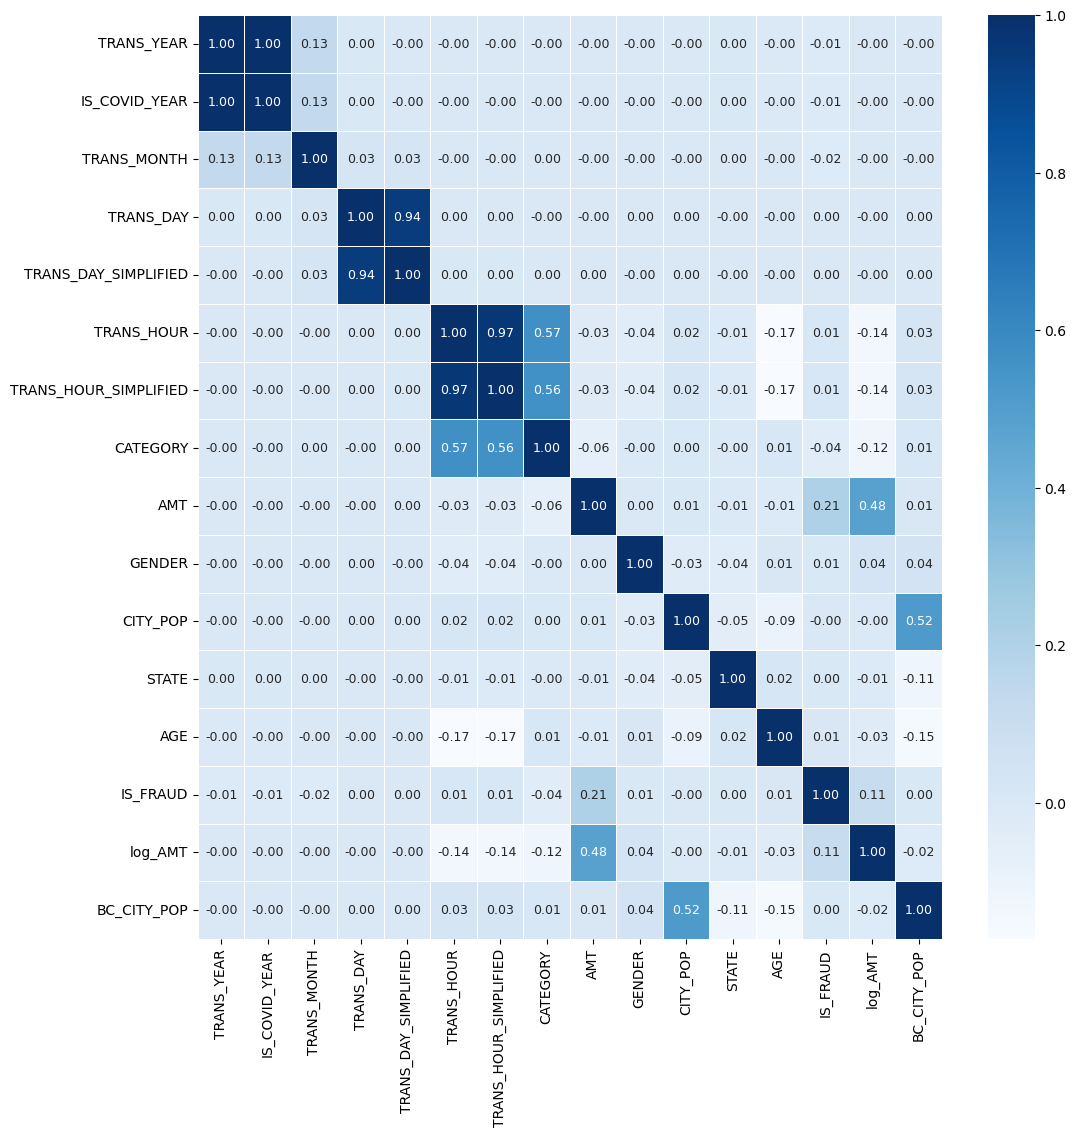

In [29]:
# remove experimental columns
df = df.drop(columns='log_CITY_POP')  
df = df.drop(columns='logd_CITY_POP')

# define numeric data correlation
df_corr = df.corr()

# visualize correlation by heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, annot_kws = {"size" : 9}, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

* All correlation < 0.6 except for itself or its transformed column  
* The target data(IS_FRAUD)'s correlation is low with all other columns.  
This can be attributed to the unbalnced data problem.  
* There might be Multicolinearity between CATEGORY and TRANS_HOUR  

* 모든 상관계수가 자기자신과, 변형 데이터(log, simplified)를 제외하면 0.6 이하이다.  
* Target인 IS_FRAUD의 상관계수가 대부분 낮게 나오는 이유는 unbalnced data 문제로 추정된다. 이는 추후 분석단계에서 다룬다.
* CATEGORY와 TRANS_HOUR 사이에 상관계수가 0.57로 높게 나오므로 이에 대한 Multicolinearity를 점검한다.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create VIF DF. VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# Create test data for VIF and remove its index.
# VIF 출력을 위한 임의의 test data 형성 및 인덱스 제거
test = pd.DataFrame(df['CATEGORY'], df['TRANS_HOUR'])
test = test.reset_index()

# Set the name of two columns. VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif["features"] = test.columns 

# Set descending order. VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,2.786342,CATEGORY
1,2.786342,TRANS_HOUR


None of them is above 10. Hence, there is no multicolinearity.  
VIF factor가 10이 넘지 않으므로 multicolinearity가 없다고 판단할 수 있다.

In [31]:
# Save all process so far without index
# SQL 작업 + 지금까지의 분석 데이터 저장 (index 생성 방지 옵션 설정)
df.to_csv('data/Fraud_Detection_sql.csv', index=False) 

In [32]:
# check the saved csv file
FD = pd.read_csv('data/Fraud_Detection_sql.csv')
FD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604294 entries, 0 to 1604293
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TRANS_YEAR             1604294 non-null  int64  
 1   IS_COVID_YEAR          1604294 non-null  int64  
 2   TRANS_MONTH            1604294 non-null  int64  
 3   TRANS_DAY              1604294 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   1604294 non-null  int64  
 5   TRANS_HOUR             1604294 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  1604294 non-null  int64  
 7   CATEGORY               1604294 non-null  int64  
 8   AMT                    1604294 non-null  float64
 9   GENDER                 1604294 non-null  int64  
 10  CITY                   1604294 non-null  object 
 11  CITY_POP               1604294 non-null  int64  
 12  STATE                  1604294 non-null  int64  
 13  JOB                    1604294 non-null  object 
 14  AGE               

In [33]:
FD.isnull().sum()  # check null

TRANS_YEAR               0
IS_COVID_YEAR            0
TRANS_MONTH              0
TRANS_DAY                0
TRANS_DAY_SIMPLIFIED     0
TRANS_HOUR               0
TRANS_HOUR_SIMPLIFIED    0
CATEGORY                 0
AMT                      0
GENDER                   0
CITY                     0
CITY_POP                 0
STATE                    0
JOB                      0
AGE                      0
IS_FRAUD                 0
CC_NUM                   0
log_AMT                  0
BC_CITY_POP              0
dtype: int64